# Classifying DNA Sequences

## Problem
Classifying DNA sequences accurately and efficiently is a critical task in bioinformatics, as it enables the identification of important genetic information, such as gene functions and disease associations. However, manual classification of DNA sequences is time-consuming and error-prone, necessitating the development of an automated machine learning-based approach that can effectively classify DNA sequences into their respective functional or genomic categories, facilitating biological research and applications in various fields.

We will explore the world of bioinformatics by using Markov models, K-nearest neighbor (KNN) algorithms, support vector machines, and other common classifiers to classify short E. Coli DNA sequences. This project will use a dataset from the UCI Machine Learning Repository that has 106 DNA sequences, with 57 sequential nucleotides (“base-pairs”) each.



## Objective
Develop a machine learning-based classification model for accurately categorizing DNA sequences into their respective functional or genomic categories.

In [1]:
# Load libraries
import numpy as np 
import pandas as pd
import researchpy as rp 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [3]:
# Load dataset
# import the uci Molecular Biology (Promoter Gene Sequences) Data Set
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/molecular-biology/promoter-gene-sequences/promoters.data'
names = ['Class', 'id', 'Sequence']
data = pd.read_csv(url, names = names)
data.head()

,Class,id,Sequence
0,+,S10,\t\ttactagcaatacgcttgcgttcggtggttaagtatgtataat...
1,+,AMPC,\t\ttgctatcctgacagttgtcacgctgattggtgtcgttacaat...
2,+,AROH,\t\tgtactagagaactagtgcattagcttatttttttgttatcat...
3,+,DEOP2,\taattgtgatgtgtatcgaagtgtgttgcggagtagatgttagaa...
4,+,LEU1_TRNA,\ttcgataattaactattgacgaaaagctgaaaaccactagaatgc...


## Exploring Data 

In [4]:
# check shape of data 
data.shape

(106, 3)

In [5]:
# dtypes 
data.dtypes

Class       object
id          object
Sequence    object
dtype: object

In [6]:
# info 
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Class     106 non-null    object
 1   id        106 non-null    object
 2   Sequence  106 non-null    object
dtypes: object(3)
memory usage: 2.6+ KB


In [7]:
# check missing data 
data.isnull().sum() 

Class       0
id          0
Sequence    0
dtype: int64

## Setup 

In [8]:
# exmine first few rows of data 
data.head() 

,Class,id,Sequence
0,+,S10,\t\ttactagcaatacgcttgcgttcggtggttaagtatgtataat...
1,+,AMPC,\t\ttgctatcctgacagttgtcacgctgattggtgtcgttacaat...
2,+,AROH,\t\tgtactagagaactagtgcattagcttatttttttgttatcat...
3,+,DEOP2,\taattgtgatgtgtatcgaagtgtgttgcggagtagatgttagaa...
4,+,LEU1_TRNA,\ttcgataattaactattgacgaaaagctgaaaaccactagaatgc...


In [9]:
# import pycaret classification and init setup
from pycaret.classification import *
setup(data, target = 'Class', session_id = 123)

,Description,Value
0,Session id,123
1,Target,Class
2,Target type,Binary
3,Target mapping,"+: 0, -: 1"
4,Original data shape,"(106, 3)"
5,Transformed data shape,"(106, 3)"
6,Transformed train set shape,"(74, 3)"
7,Transformed test set shape,"(32, 3)"
8,Categorical features,2
9,Preprocess,True


## Compare Models 

In [12]:
# compare baseline models
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
svm,SVM - Linear Kernel,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.3560
qda,Quadratic Discriminant Analysis,0.5000,0.3500,0.6000,0.3000,0.3982,0.0000,0.0000,0.3640
et,Extra Trees Classifier,0.5000,0.5000,1.0000,0.5000,0.6648,0.0000,0.0000,0.4130
lr,Logistic Regression,0.4571,0.5000,0.7000,0.3286,0.4467,0.0000,0.0000,0.9160
knn,K Neighbors Classifier,0.4571,0.5000,0.3000,0.1286,0.1800,0.0000,0.0000,0.3850
nb,Naive Bayes,0.4571,0.5000,0.3000,0.1286,0.1800,0.0000,0.0000,0.3420
dt,Decision Tree Classifier,0.4571,0.5000,0.3000,0.1286,0.1800,0.0000,0.0000,0.3500
ridge,Ridge Classifier,0.4571,0.0000,0.3000,0.1286,0.1800,0.0000,0.0000,0.3670
rf,Random Forest Classifier,0.4571,0.5000,0.3000,0.1286,0.1800,0.0000,0.0000,0.4170
ada,Ada Boost Classifier,0.4571,0.5000,0.3000,0.1286,0.1800,0.0000,0.0000,0.3660


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

## Create Model 

In [14]:
# create model 
svm = create_model('svm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.4286,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.4286,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.4286,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.5714,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.5714,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [15]:
# print model parameters
print(svm)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.001, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=-1, penalty='l2',
              power_t=0.5, random_state=123, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)


## Tune Model 

In [16]:
# tune hyperparameters of rf
tuned_svm = tune_model(svm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.4286,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.4286,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.4286,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.5714,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.5714,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [24]:
# to access the tuner object you can set return_tuner = True
tuned_rf, tuner = tune_model(rf, return_tuner=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [25]:
tuned_rf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)

In [26]:
tuner

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
                   error_score=nan,
                   estimator=Pipeline(memory=FastMemory(location=C:\Users\JHossain\AppData\Local\Temp\joblib),
                                      steps=[('label_encoding',
                                              TransformerWrapperWithInverse(exclude=None,
                                                                            include=None,
                                                                            transformer=LabelEncoder())),
                                             ('numerical_imputer',
                                              TransformerWrapper(exclude=No...
                                        'actual_estimator__min_samples_leaf': [2,
                                                                               3,
                                                                               4,
                                                                               5,
                                                                               6],
                                        'actual_estimator__min_samples_split': [2,
                                                                                5,
                                                                                7,
                                                                                9,
                                                                                10],
                                        'actual_estimator__n_estimators': [10,
                                                                           20,
                                                                           30,
                                                                           40,
                                                                           50,
                                                                           60,
                                                                           70,
                                                                           80,
                                                                           90,
                                                                           100,
                                                                           110,
                                                                           120,
                                                                           130,
                                                                           140,
                                                                           150,
                                                                           160,
                                                                           170,
                                                                           180,
                                                                           190,
                                                                           200,
                                                                           210,
                                                                           220,
                                                                           230,
                                                                           240,
                                                                           250,
                                                                           260,
                                                                           270,
                                                                           280,
                                                                           290,
                                                                           300]},
                   pre_dispatch='2*n_jobs', random

## Analyze Model 

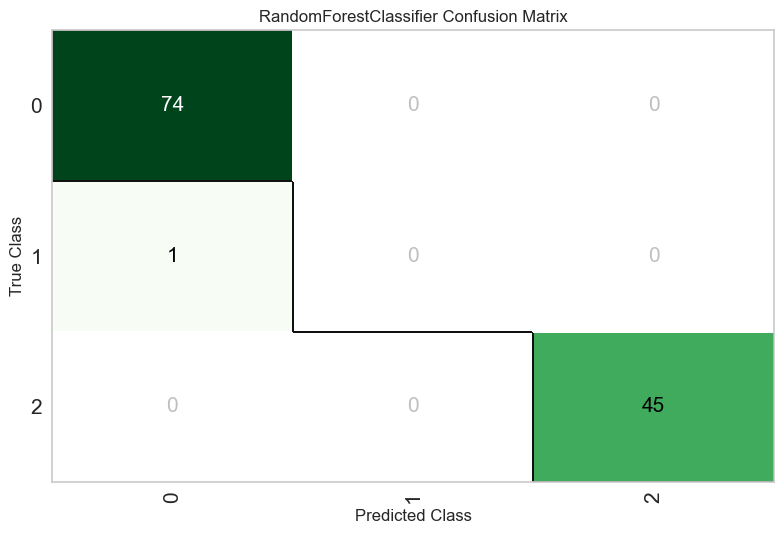

In [27]:
# plot confusion matrix
plot_model(best, plot = 'confusion_matrix')

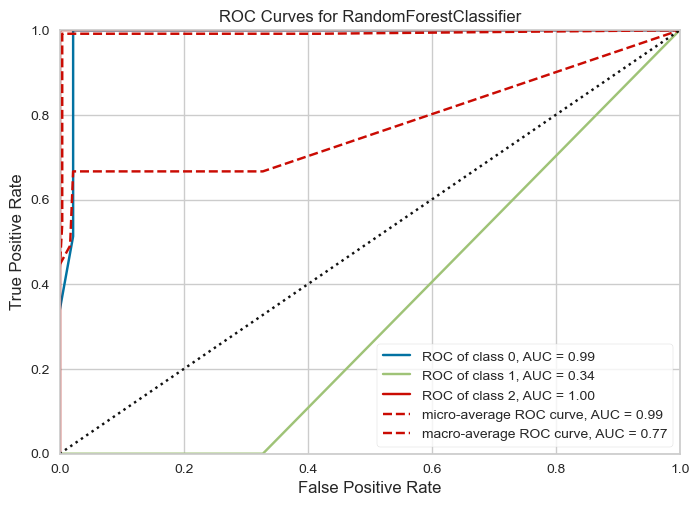

In [28]:
# plot AUC
plot_model(best, plot = 'auc')

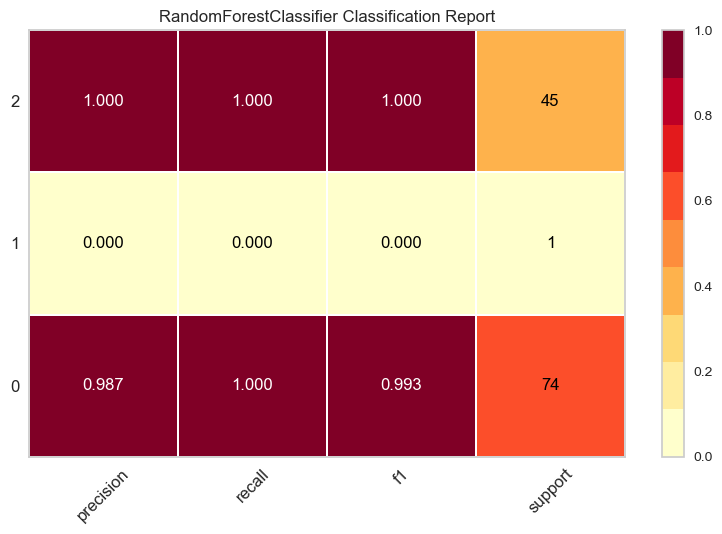

In [29]:
# plot class report
plot_model(best, plot = 'class_report')

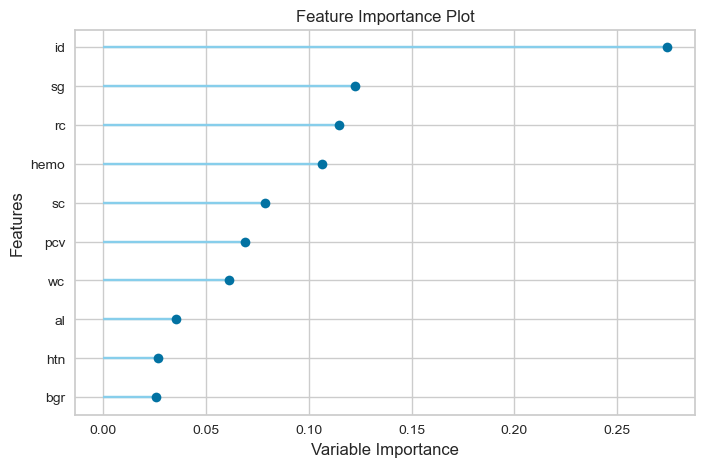

In [30]:
# plot feature importance
plot_model(best, plot = 'feature')

## Evaluate Model 

In [31]:
# evaluate model 
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

## Finalize Model 

In [32]:
# finalize a model
finalize_model(rf)

Pipeline(memory=FastMemory(location=C:\Users\JHossain\AppData\Local\Temp\joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['id', 'age', 'bp', 'sg', 'al',
                                             'su', 'bgr', 'bu', 'sc', 'sod',
                                             'pot', 'hemo'],
                                    transformer=SimpleImputer(add_...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='sqrt',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=-1,
                                        oob_score=False, random_state=123,
                                        verbose=0, warm_start=False))],
         verbose=False)

## Prediction

In [33]:
# predict on test set
holdout_pred = predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9917,0,0.9917,0.9834,0.9875,0.9824,0.9826


In [34]:
# show predictions df
holdout_pred.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,rc,htn,dm,cad,appet,pe,ane,classification,prediction_label,prediction_score
247,247,54.0,90.0,1.025,1.0,0.0,normal,abnormal,notpresent,notpresent,...,NaN,no,no,no,poor,yes,yes,0,ckd,0.93
69,69,26.0,70.0,1.015,0.0,4.0,NaN,normal,notpresent,notpresent,...,6.0,no,yes,no,good,no,no,0,ckd,0.85
289,289,42.0,70.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,5.3,no,no,no,good,no,no,2,notckd,1.00
372,372,72.0,60.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,5.5,no,no,no,good,no,no,2,notckd,1.00
139,139,41.0,70.0,1.015,2.0,0.0,NaN,abnormal,notpresent,present,...,NaN,yes,no,no,good,yes,yes,0,ckd,1.00


In [35]:
# copy data and drop Class variable
new_data = data.copy()
new_data.drop('classification', axis=1, inplace=True)
new_data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,15.4,44,7800,5.2,yes,yes,no,good,no,no
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,11.3,38,6000,NaN,no,no,no,good,no,no
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,9.6,31,7500,NaN,no,yes,no,poor,no,yes
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,11.2,32,6700,3.9,yes,no,no,poor,yes,yes
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,11.6,35,7300,4.6,no,no,no,good,no,no


In [36]:
# predict model on new_data
predictions = predict_model(best, data = new_data)
predictions.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,wc,rc,htn,dm,cad,appet,pe,ane,prediction_label,prediction_score
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,7800,5.2,yes,yes,no,good,no,no,ckd,0.89
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,6000,NaN,no,no,no,good,no,no,ckd,0.98
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,7500,NaN,no,yes,no,poor,no,yes,ckd,0.98
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,6700,3.9,yes,no,no,poor,yes,yes,ckd,1.00
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,7300,4.6,no,no,no,good,no,no,ckd,1.00


## Save Model 

In [39]:
# save pipeline
save_model(best, '../models/chronic_kidney')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\JHossain\AppData\Local\Temp\joblib),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['id', 'age', 'bp', 'sg', 'al',
                                              'su', 'bgr', 'bu', 'sc', 'sod',
                                              'pot', 'hemo'],
                                     transformer=SimpleImputer(add_...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight=None, criterion='gini',
                                         max_depth=None, max_features='sqrt',
                                         max_leaf_nodes=None, max_samples=None,
                                         

In [40]:
# load pipeline
loaded_best_pipeline = load_model('../models/chronic_kidney')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=C:\Users\JHossain\AppData\Local\Temp\joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['id', 'age', 'bp', 'sg', 'al',
                                             'su', 'bgr', 'bu', 'sc', 'sod',
                                             'pot', 'hemo'],
                                    transformer=SimpleImputer(add_...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='sqrt',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=-1,
                                        oob_score=False, random_state=123,
                                        verbose=0, warm_start=False))],
         verbose=False)